In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Step 1: Create a quantum circuit with 2 qubits (representing two possible paths through the grating)
qc = QuantumCircuit(2)



In [5]:
# Step 2: Initialize both qubits in the |0> state (representing light before passing through the diffraction grating)
qc.initialize([1, 0], 0)  # Qubit 0
qc.initialize([1, 0], 1)  # Qubit 1



In [6]:
# Step 3: Apply a Hadamard gate to both qubits to simulate superposition (light passing through both paths)
# This represents the light diffracting through multiple slits, creating superpositions of different paths
qc.h(0)
qc.h(1)



In [7]:
# Step 4: Apply phase gates to simulate the path differences caused by the diffraction grating
# These phase differences represent the different optical path lengths through the grating
qc.p(np.pi/4, 0)  # Apply phase shift to qubit 0
qc.p(np.pi/2, 1)  # Apply phase shift to qubit 1



In [8]:
# Step 5: Apply another Hadamard gate to simulate the light recombining and interfering on the observation screen
qc.h(0)
qc.h(1)



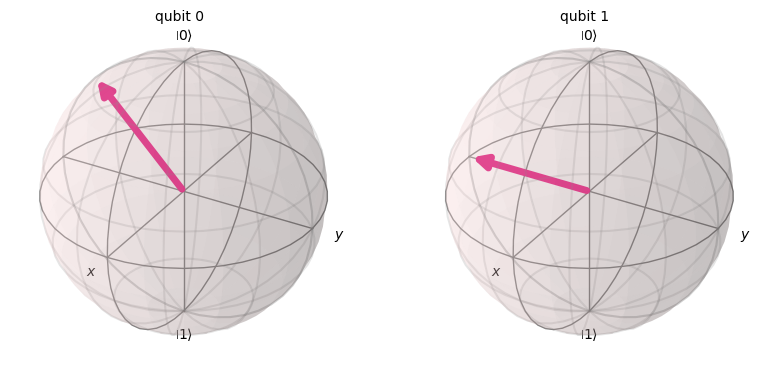

In [9]:
# Step 6: Visualize the qubits' states on the Bloch sphere to observe the diffraction pattern
final_state = StatevectorSimulator().run(qc).result().get_statevector()

plot_bloch_multivector(final_state)



In [10]:
# Step 7: Measure both qubits to observe the probability distribution (representing the diffraction pattern)
qc.measure_all()



In [11]:
# Step 8: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)




Measurement results: {'11': 74, '01': 79, '00': 460, '10': 411}


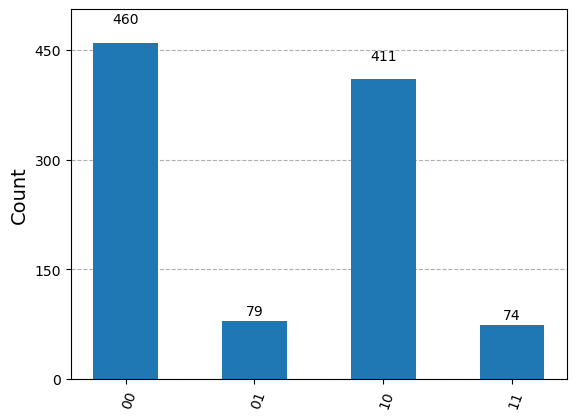

In [12]:
# Print the measurement results and plot the histogram (representing the diffraction pattern)
print(f"Measurement results: {counts}")
plot_histogram(counts)



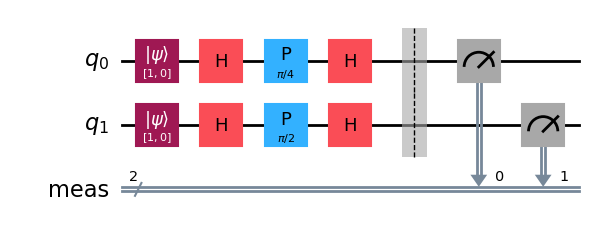

In [13]:
# Draw the quantum circuit
qc.draw(output='mpl')